In [98]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import hstack
from astropy.table import Column

Open a list of CRTS QSO : 

In [133]:
File = 'file.list'
crts_qso = Table.read(File, format='ascii', names=['CRTS_name'])
radec = np.array(crts_qso['CRTS_name'])
radec

array(['000011.96+000225.3.dat', '000014.82-011030.6.dat',
       '000017.88+002612.6.dat', ..., '235958.66-011225.2.dat',
       '235958.72+003345.3.dat', '235959.44+000841.5.dat'], 
      dtype='<U22')

In [100]:
radec_split = np.zeros_like(radec, dtype='<U30')
for i in range(0, len(radec)): 
    radec_split[i] = radec[i][0:2]+' '+ radec[i][2:4] + ' ' + radec[i][4:9]+' '+ \
                     radec[i][9:12]+' '+ radec[i][12:14] + ' ' + radec[i][14:18]        

In [101]:
radec_split

array(['00 00 11.96 +00 02 25.3', '00 00 14.82 -01 10 30.6',
       '00 00 17.88 +00 26 12.6', ..., '23 59 58.66 -01 12 25.2',
       '23 59 58.72 +00 33 45.3', '23 59 59.44 +00 08 41.5'], 
      dtype='<U30')

Use AstroPy to convert that to degrees : 

In [102]:
radec_astropy = SkyCoord(radec_split, unit=(u.hourangle, u.deg))
radec_astropy.dec

<Latitude [ 0.04036111,-1.17516667, 0.43683333,..., -1.207     ,
            0.56258333, 0.14486111] deg>

(array([ 3077.,  1826.,     0.,     0.,     0.,     0.,     0.,     0.,
          527.,  2500.]),
 array([  4.98333333e-02,   3.60446167e+01,   7.20394000e+01,
          1.08034183e+02,   1.44028967e+02,   1.80023750e+02,
          2.16018533e+02,   2.52013317e+02,   2.88008100e+02,
          3.24002883e+02,   3.59997667e+02]),
 <a list of 10 Patch objects>)

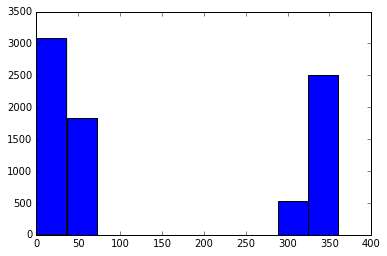

In [126]:
%matplotlib inline

import matplotlib.pyplot as plt 
plt.hist(radec_astropy.ra.value)

In [123]:
radec_astropy.ra.value

array([  4.98333333e-02,   6.17500000e-02,   7.45000000e-02, ...,
         3.59994417e+02,   3.59994667e+02,   3.59997667e+02])

SDSS Quasar catalog : 

In [103]:
File = 'DB_QSO_S82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
sdss_qso = Table.read(File, format='ascii', names = colnames)

Match CRTS to SDSS : 

In [104]:
cat1 = radec_astropy
cat2_ra  = sdss_qso['ra']
cat2_dec = sdss_qso['dec']
cat2 = SkyCoord(ra=cat2_ra*u.degree, dec=cat2_dec*u.degree)
idx, sep2d, dist3d = cat1.match_to_catalog_sky(cat2) 
match_angle_arcsec = sep2d.value * 3600


In [134]:
# select matching rows from SDSS and make a new column with matching radius
sdss_select_rows = sdss_qso[idx]

match_angle = Column(name='match_angle_arcsec',data= match_angle_arcsec)
sdss_select_rows.add_column(match_angle)

# stack two tables horizontally, since they are already matched.
crts_sdss_matched = hstack([crts_qso, sdss_select_rows])

In [135]:
len(crts_sdss_matched)

7930

In [136]:
# add columns with CRTS ra, dec in degrees.... 
ra = Column(name='ra_CRTS', data = radec_astropy.ra.value)
dec = Column(name='dec_CRTS', data = radec_astropy.dec.value)
crts_sdss_matched.add_column(ra)
crts_sdss_matched.add_column(dec)

Find how many objects are not matched to within 1 arcsec... 

In [106]:
np.sum(crts_sdss_matched['match_angle_arcsec'] > 1)

15

In [137]:
# Mismatched objects...
mask  = crts_sdss_matched['match_angle_arcsec'] > 1
crts_sdss_matched[mask]

CRTS_name,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au,match_angle_arcsec,ra_CRTS,dec_CRTS
str22,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
005621.72+003235.6.dat,203782,14.160388,0.611479,2207,-24.237,-24.167,1.2352,0.0,0.0,21.602,20.912,20.228,20.049,20.12,0.137,351.674559391,14.0905,0.543222222222
010617.84-001857.5.dat,601626,16.577963,-0.367788,2535,-22.042,-22.607,0.4468,7.536,45.136,20.63,20.358,20.214,19.81,19.432,0.207,186.993884728,16.5743333333,-0.315972222222
012723.65-004630.1.dat,972719,21.790438,-0.823125,3285,-25.619,-26.073,1.8917,0.0,46.213,20.18,20.088,20.091,19.676,19.679,0.153,271.525022433,21.8485416667,-0.775027777778
013416.34+001413.5.dat,905667,23.575804,0.26019,3587,-24.81,-25.493,0.3999,0.0,46.106,16.969,16.807,16.798,16.749,16.391,0.142,87.7045721106,23.5680833333,0.237083333333
020038.67-005954.5.dat,1572529,30.27578,-0.948508,4669,-23.027,-23.759,0.7045,7.765,45.299,20.648,20.108,19.985,19.905,19.613,0.143,450.192877296,30.161125,-0.998472222222
025458.56-000423.2.dat,2477355,43.793972,-0.120296,6692,-25.374,-25.764,1.6864,9.014,46.266,20.541,20.234,20.134,19.742,19.658,0.371,247.422614573,43.744,-0.0731111111111
025600.14+010258.3.dat,2522803,44.029736,1.077224,6741,-25.644,-26.231,2.0918,0.0,0.0,20.92,20.608,20.267,20.016,19.709,0.484,144.748025985,44.0005833333,1.04952777778
032759.20-005421.9.dat,3796954,51.851318,-0.857827,7837,-26.174,-26.686,1.9001,9.686,46.563,20.101,19.813,19.483,19.306,19.187,0.585,551.280989912,51.9966666667,-0.906083333333
034252.47+005252.4.dat,4895372,55.730446,0.823176,8389,-24.723,-24.911,1.654,0.0,0.0,20.982,20.879,20.701,20.456,20.431,0.637,213.254624003,55.718625,0.881222222222


In [152]:
# save the mismatched QSO names and ra, dec ....

np.savetxt('CRTS_mismatch_QSO_names.txt', crts_sdss_matched[mask]['CRTS_name'], fmt='%s')
np.savetxt('CRTS_mismatch_QSO_ra_dec.txt', crts_sdss_matched[mask]['ra_CRTS','dec_CRTS'], fmt='%13.8f')